## HARIHARASUDHAN D
## CARDIOVASCULAR RISK PREDICTION MODEL USING MACHINE LEARNING
### Import Libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Impoting data preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing model selection libraries.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Importing metrics for model evaluation.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing SMOTE for handling class imbalance.
from imblearn.over_sampling import SMOTE

# Importing warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

# Generate a confusion matrix
# This function can be useful for quickly visualizing the performance of a classification model.
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    


### Dataset Loading

In [10]:
cardio_df = pd.read_csv("data_cardiovascular_risk.csv")

In [11]:
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [12]:
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [13]:
cardio_df.shape

(3390, 17)

In [14]:
print(f'number of rows : {cardio_df.shape[0]}  \nnumber of columns : {cardio_df.shape[1]}')

number of rows : 3390  
number of columns : 17


In [15]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [16]:

value = len(cardio_df[cardio_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


### Missing Values/Null Values

In [17]:
print(cardio_df.isnull().sum())

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


We can see there are null values present in totChol, BMI, glucose, BPMeds, cigsPerDay, education has some null values and heartRate has 1 null value.

In [19]:

round(cardio_df.isna().sum()/len(cardio_df)*100, 2)

id                 0.00
age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

<Axes: >

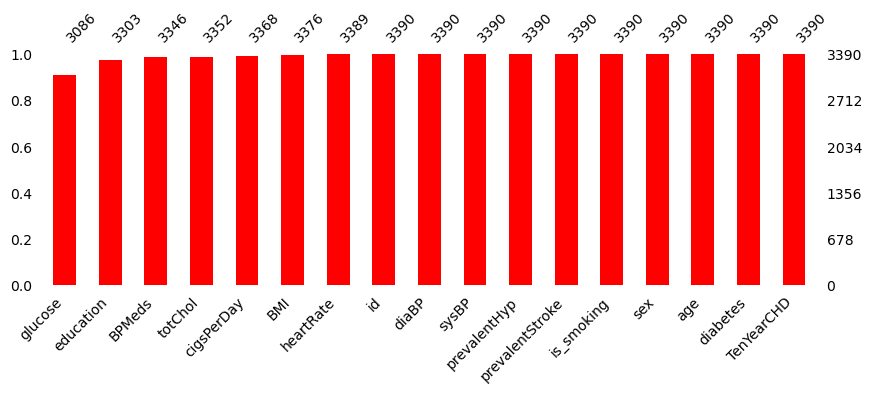

In [20]:
# Visualizing the missing values
import missingno as msno
msno.bar(cardio_df, color='red',sort='ascending', figsize=(10,3), fontsize=10)

<Axes: >

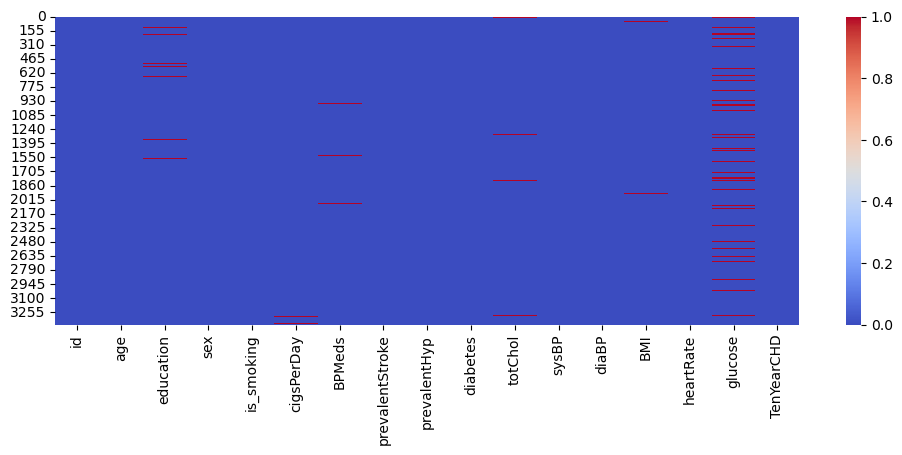

In [21]:
plt.figure(figsize=(12,4))
sns.heatmap(cardio_df.isna(), cmap = 'coolwarm')

In [22]:
# Dataset Columns
cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [24]:
# Dataset Describe 
cardio_df.describe().T  #transposes the output of the describe()

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [26]:
# Check Unique Values for each variable.
for i in cardio_df.columns.tolist():
  print("No. of unique values in",i,"is",cardio_df[i].nunique())

No. of unique values in id is 3390
No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


## EDA

In [27]:
numeric_features = []
categorical_features = []

for col in cardio_df.columns:  
  if cardio_df[col].nunique() > 10:
    numeric_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['id', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
category feature : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


#### Univariate Analysis

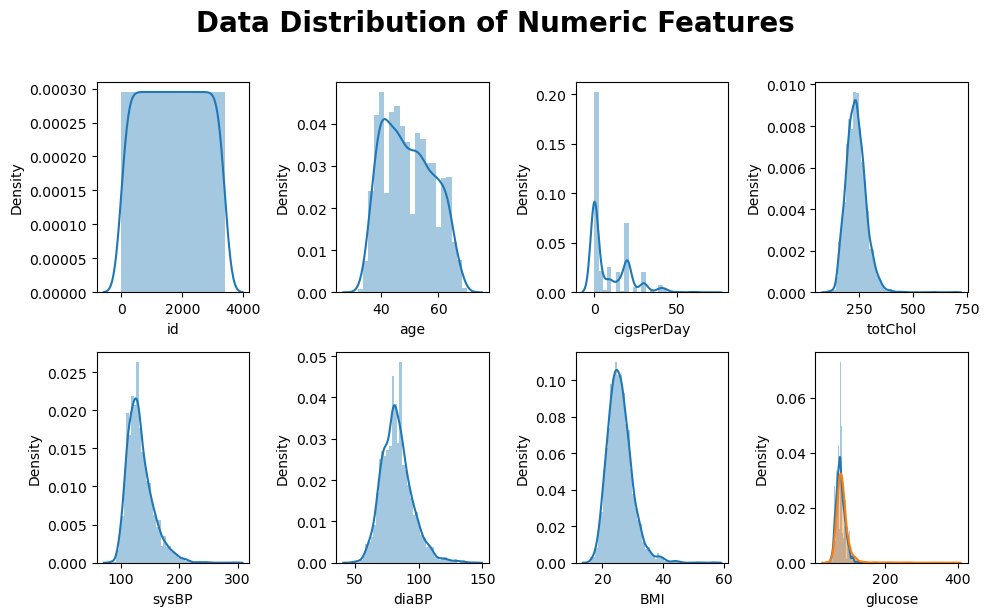

In [31]:
plt.figure(figsize=(10,6))
plt.suptitle('Data Distribution of Numeric Features', fontsize=20, fontweight='bold', y=1.02)
for i,col in enumerate(numeric_features):
    if i < 8:  # Limit the number of subplots to fit within the grid
        plt.subplot(2, 4, i+1)
    else:
        plt.subplot(2, 4, 8)  # Use the last subplot for overflow
    sns.distplot(cardio_df[col])
    plt.xlabel(col)
    plt.tight_layout()


#### Outlier Analysis of Numeric features

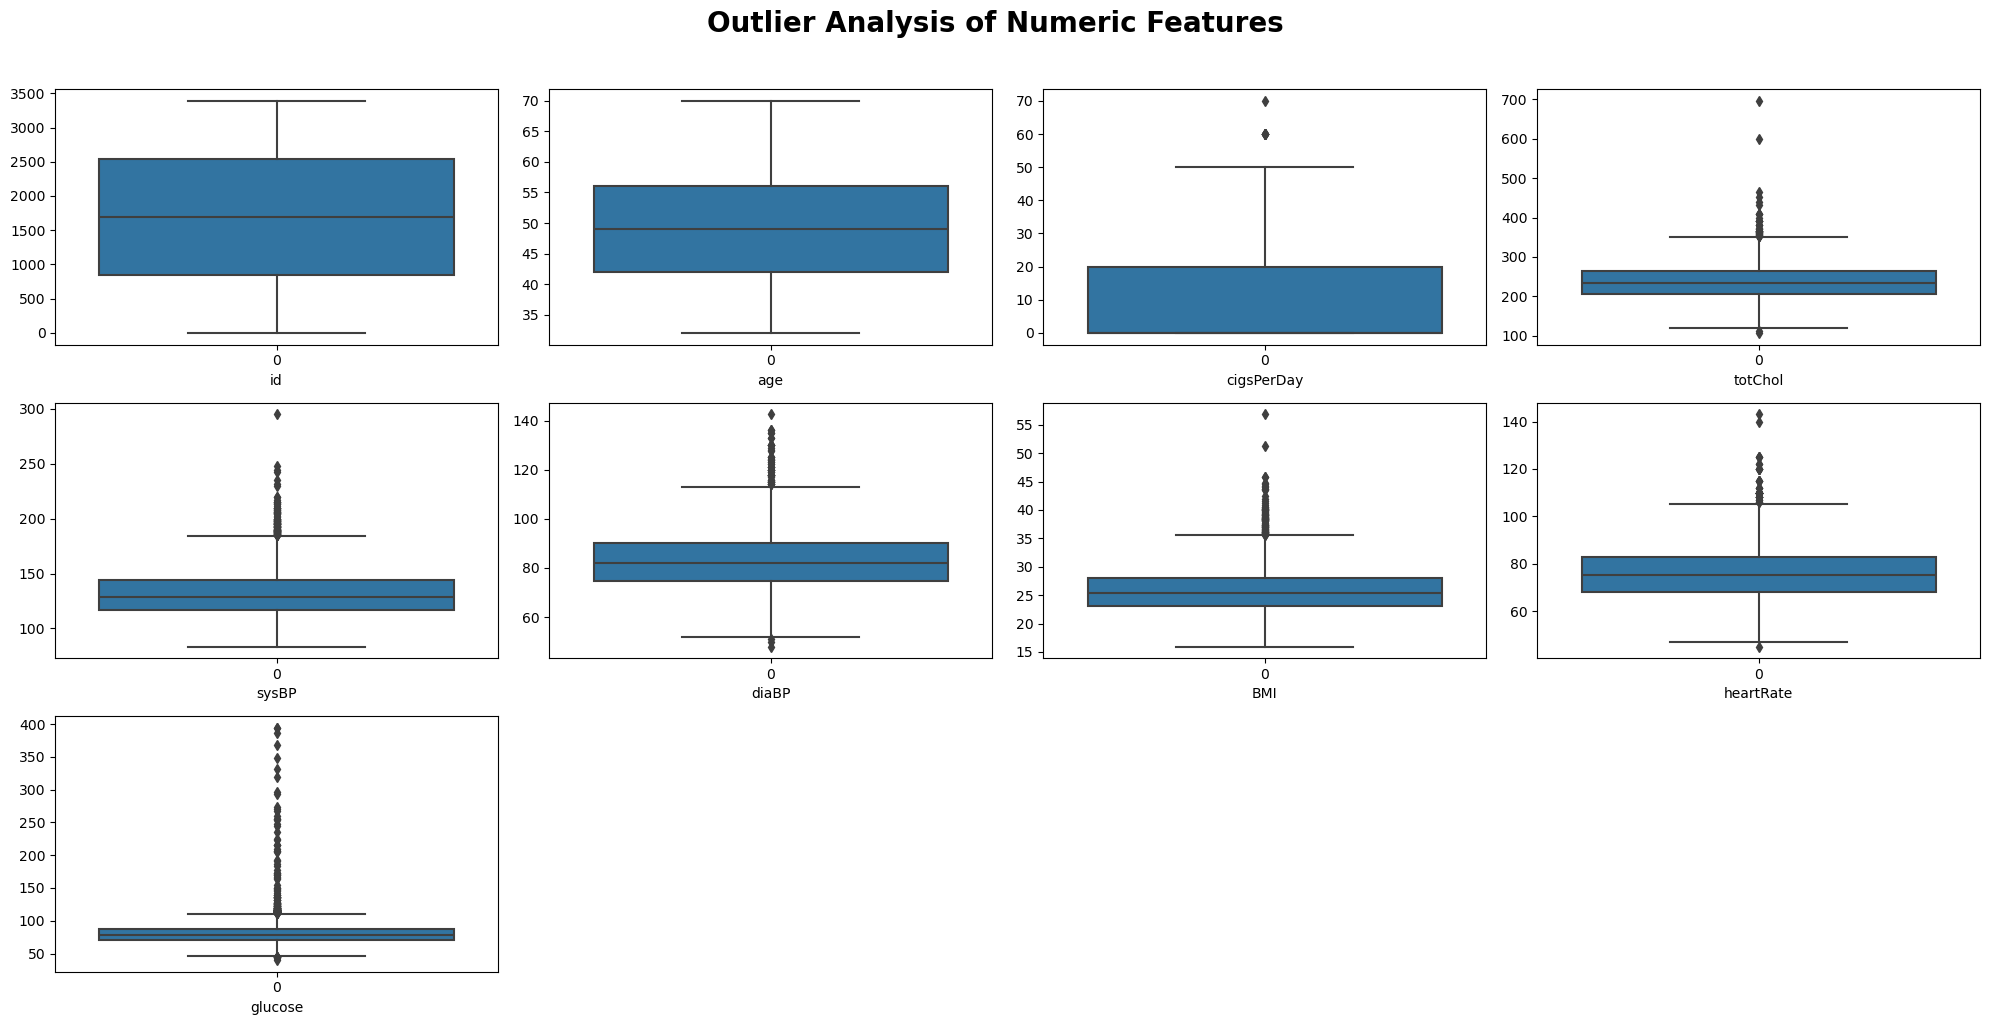

In [37]:
plt.figure(figsize=(20, 10)) #Increase the figure size
plt.suptitle('Outlier Analysis of Numeric Features', fontsize=20, fontweight='bold', y=1.02)

num_rows = (len(numeric_features) - 1) //4+1 # Calculate the number of rows needed based on the number of features
num_cols = min(len(numeric_features), 4)

for i, col in enumerate (numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(cardio_df[col])
    plt.xlabel(col)
    plt.tight_layout()

##### Univariate Analysis of Categorical Features

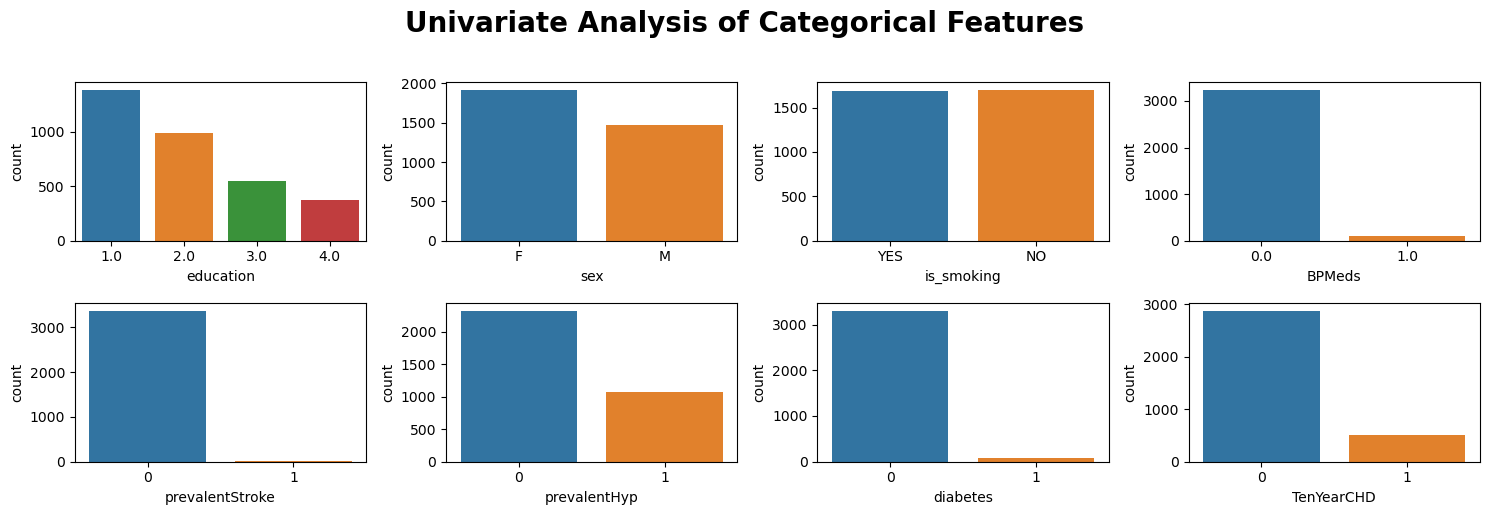

In [40]:
plt.figure(figsize=(15,5))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(categorical_features):
    plt.subplot(2, 4, i+1)
    sns.countplot(data=cardio_df, x=col)  # Specify data and x explicitly
    plt.xlabel(col)
    plt.tight_layout()


#### Bivariate and Multivariate Analysis

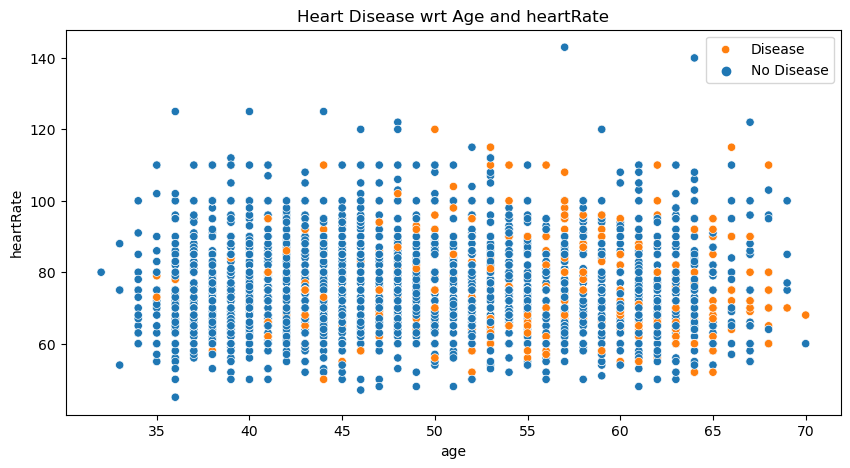

In [41]:
# plotting graph to analyze age with respect to heartrate which are having Disease or No Disease
plt.figure(figsize=(10,5))
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=cardio_df)
plt.title('Heart Disease wrt Age and heartRate')
plt.legend(['Disease', 'No Disease'])

##### Regression plot between target variable and numerical features

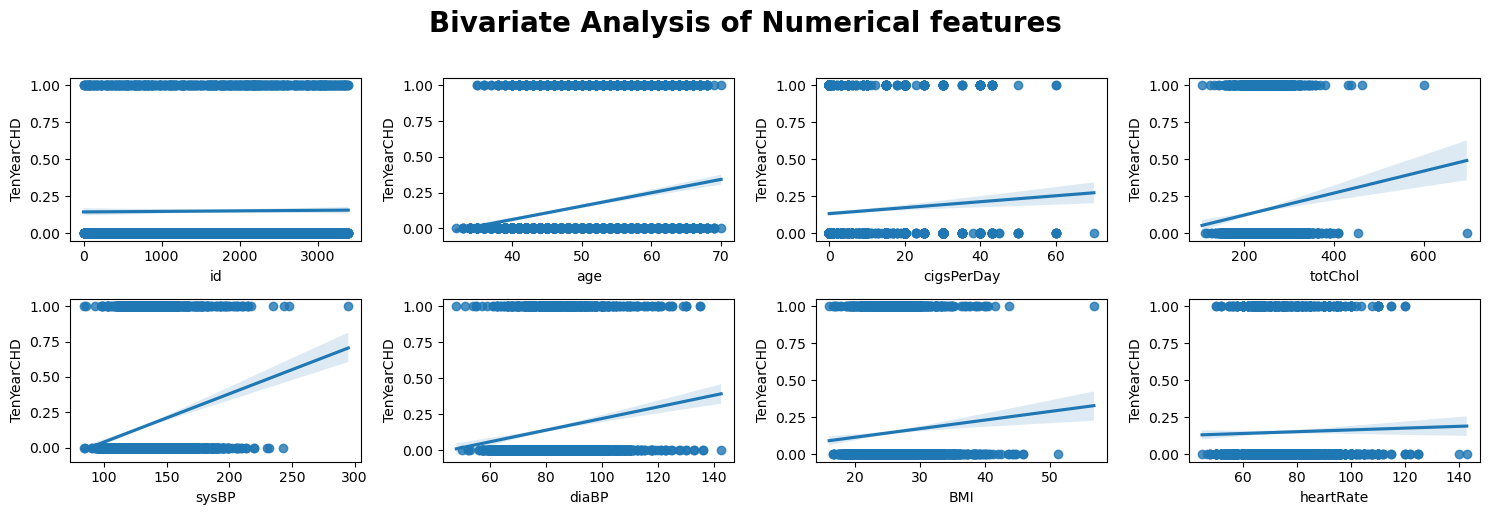

In [44]:
# Checking Linearity of all numerical features with our target variable
plt.figure(figsize=(15,5))
plt.suptitle('Bivariate Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

num_cols = min(len(numeric_features), 8)  # Limit to maximum of 8 subplots
for i, col in enumerate(numeric_features[:num_cols]):
    plt.subplot(2, 4, i+1)
    sns.regplot(x=col, y='TenYearCHD', data=cardio_df)
    plt.xlabel(col)
    plt.tight_layout()


##### Bivariate Analysis of Categorical Features

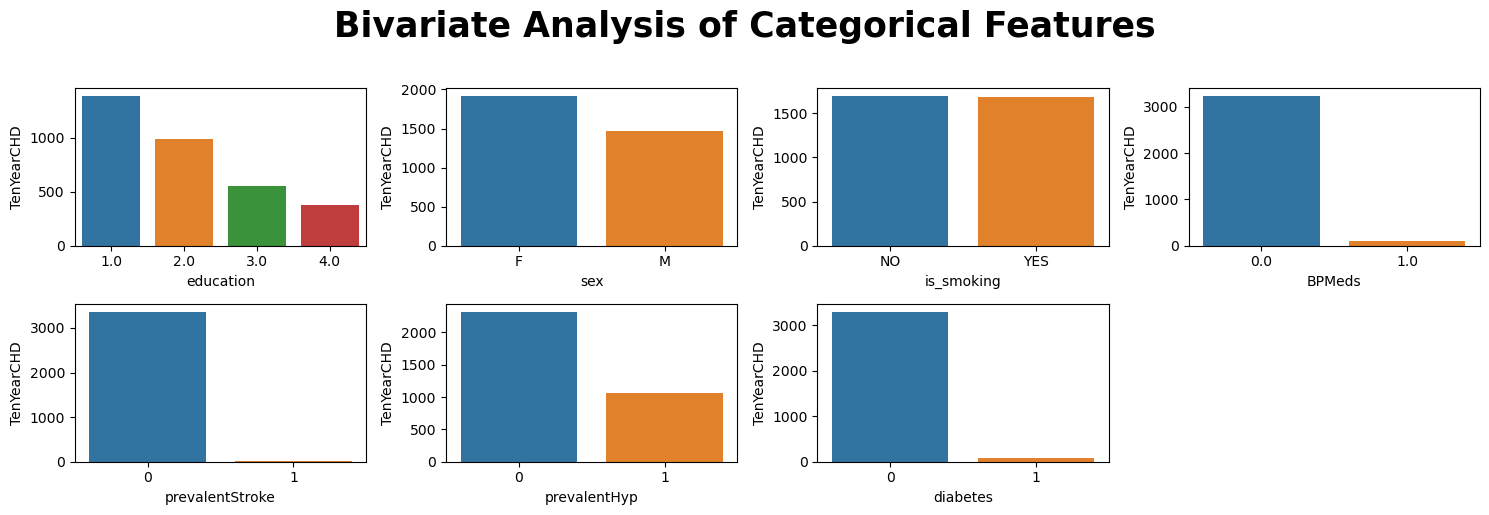

In [46]:
# Counting number of category present in each feature with respect to target feature 
plt.figure(figsize=(15,5))
plt.suptitle('Bivariate Analysis of Categorical Features', fontsize=25, fontweight='bold', y=1.02)

for i,col in enumerate(categorical_features[:-1]):       
  plt.subplot(2, 4, i+1)                                 
  a = cardio_df.groupby(col)[['TenYearCHD']].count().reset_index()
  sns.barplot(x=a[col], y=a['TenYearCHD'])
  plt.xlabel(col)
  plt.tight_layout()

### Data Cleaning

In [47]:
print(cardio_df.isnull().sum())

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


<Axes: >

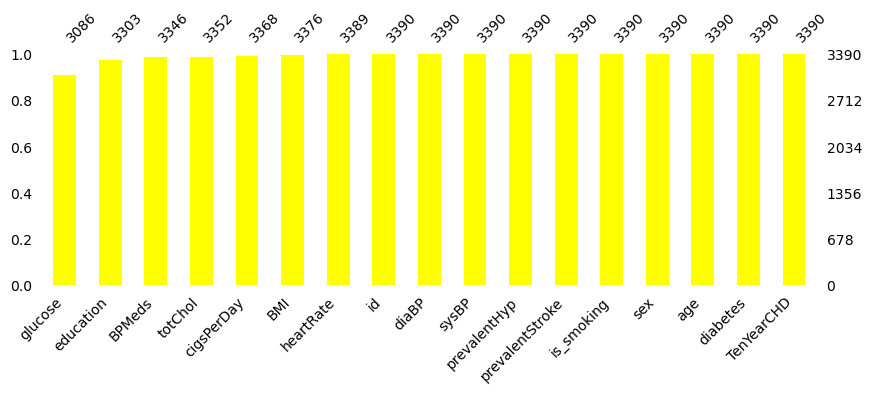

In [49]:
import missingno as msno
msno.bar(cardio_df, color='yellow',sort='ascending', figsize=(10,3), fontsize=10)

In [51]:
# Missing Values Percentage
round(cardio_df.isna().sum()/len(cardio_df)*100, 2)

id                 0.00
age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

In [52]:
# features which has less than 5%  null values present. 
nan_columns = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

# dropping null values
cardio_df.dropna(subset=nan_columns, inplace=True)

In [53]:
# glucose level are continuous in nature. 
# Outlier are not treating yet thats why imputimg NaN values with median value.

cardio_df['glucose'] = cardio_df.glucose.fillna(cardio_df.glucose.median())

In [54]:
cardio_df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [55]:
cardio_df.shape

(3189, 17)

In [56]:
cardio_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3189.0,1696.238946,980.899022,1.00,847.00,1691.00,2547.00,3389.0
age,3189.0,49.423957,8.556235,32.00,42.00,49.00,56.00,70.0
education,3189.0,1.972719,1.018435,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3189.0,9.098150,11.864621,0.00,0.00,0.00,20.00,70.0
BPMeds,3189.0,0.029476,0.169164,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3189.0,0.005958,0.076970,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3189.0,0.313264,0.463894,0.00,0.00,0.00,1.00,1.0
diabetes,3189.0,0.025400,0.157361,0.00,0.00,0.00,0.00,1.0
totChol,3189.0,236.968642,44.537998,113.00,206.00,234.00,264.00,600.0
sysBP,3189.0,132.436344,22.176848,83.50,117.00,128.00,143.50,295.0


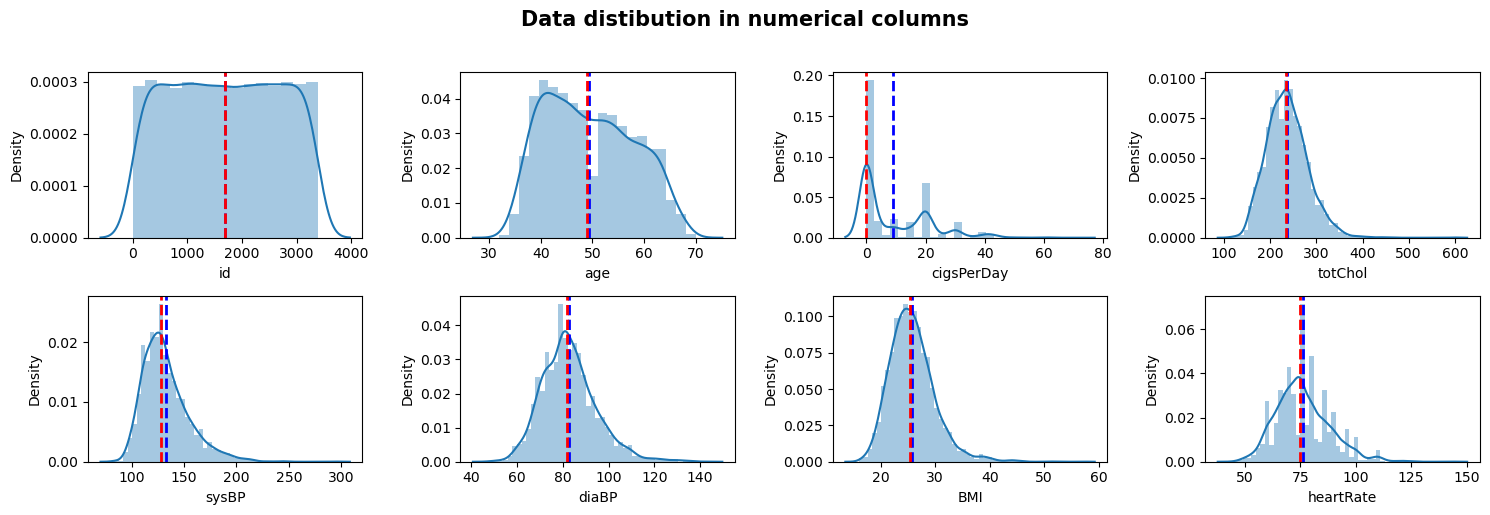

In [58]:
plt.figure(figsize=(15,5))
plt.suptitle('Data distibution in numerical columns', fontsize=15, fontweight='bold', y=1.02)

num_cols = min(len(numeric_features), 8)  # Limit to maximum of 8 subplots
for i, col in enumerate(numeric_features[:num_cols]):
    plt.subplot(2, 4, i+1)                      
    sns.distplot(cardio_df[col]) 
    # mean line
    plt.axvline(cardio_df[col].mean(), color='blue', linestyle='dashed', linewidth=2)
    # median line
    plt.axvline(cardio_df[col].median(), color='red', linestyle='dashed', linewidth=2)   
    plt.xlabel(col)
    plt.tight_layout()


### Treating Outliers

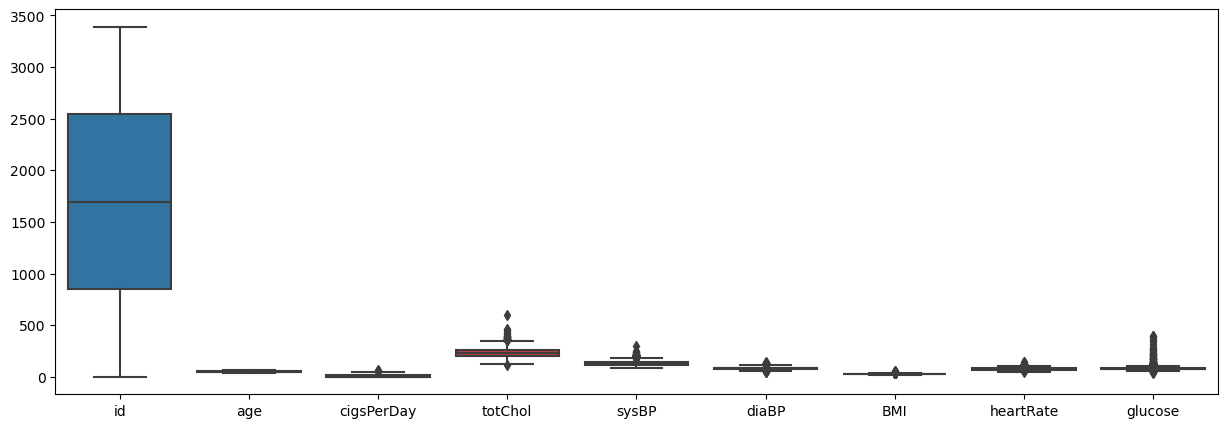

In [59]:
plt.figure(figsize=(15,5))
sns.boxplot(data=cardio_df[numeric_features])
plt.show()    

In [60]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(cardio_df):
    for col in cardio_df[numeric_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = cardio_df[col].quantile(0.25)
        q3 = cardio_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        cardio_df[col] = cardio_df[col].clip(lower_bound, upper_bound)
    return cardio_df

In [61]:
cardio_df = clip_outliers(cardio_df)

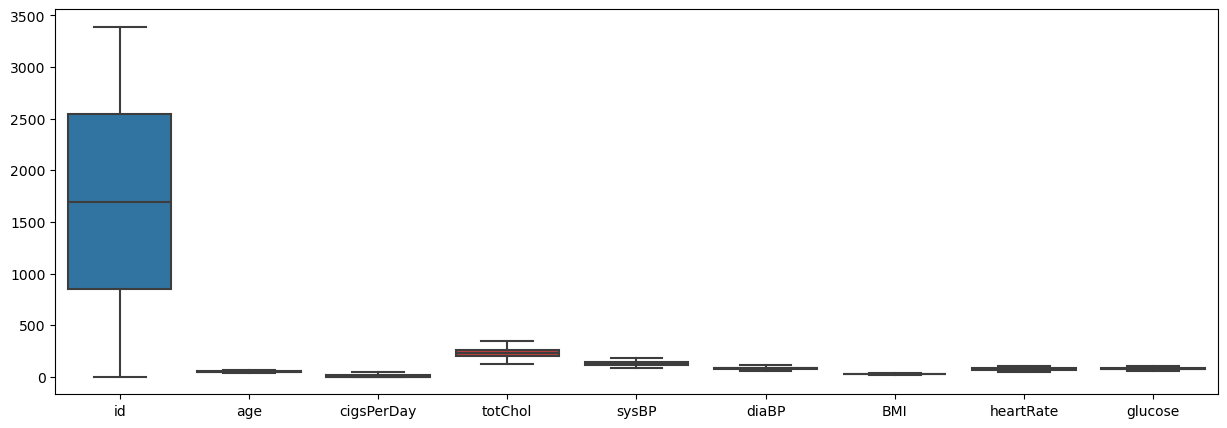

In [62]:
plt.figure(figsize=(15,5))
sns.boxplot(data=cardio_df[numeric_features])
plt.show() 

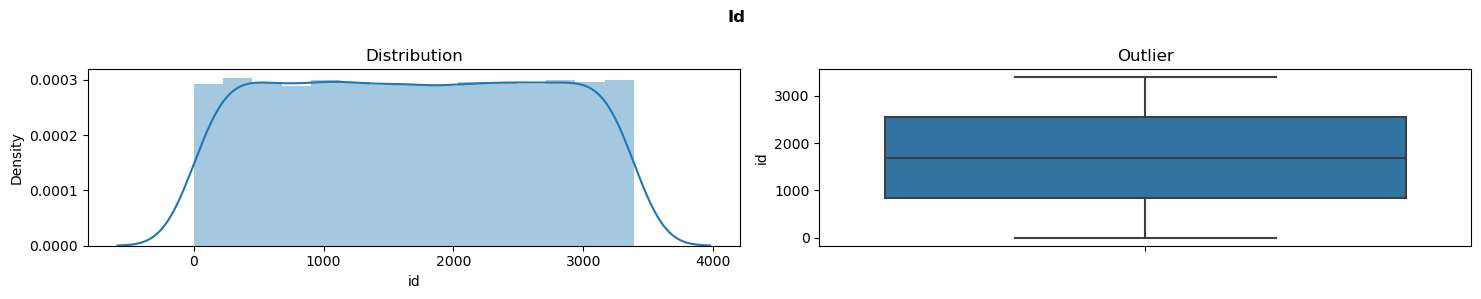

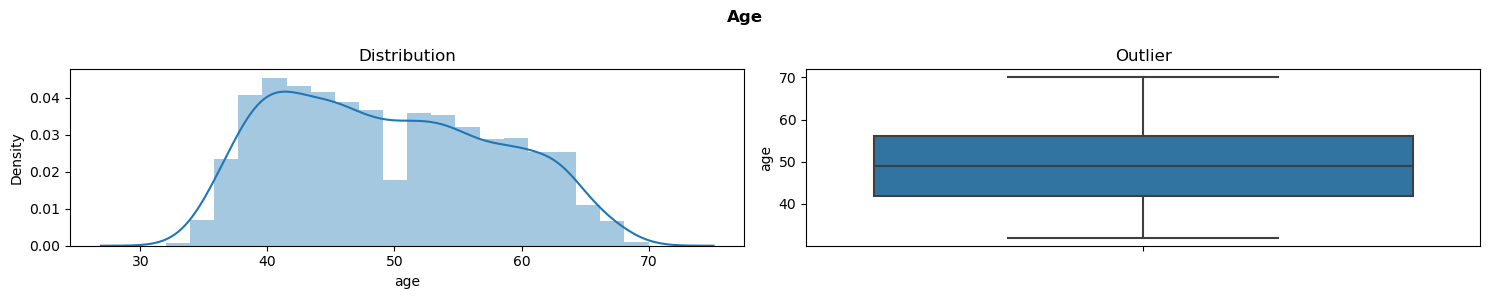

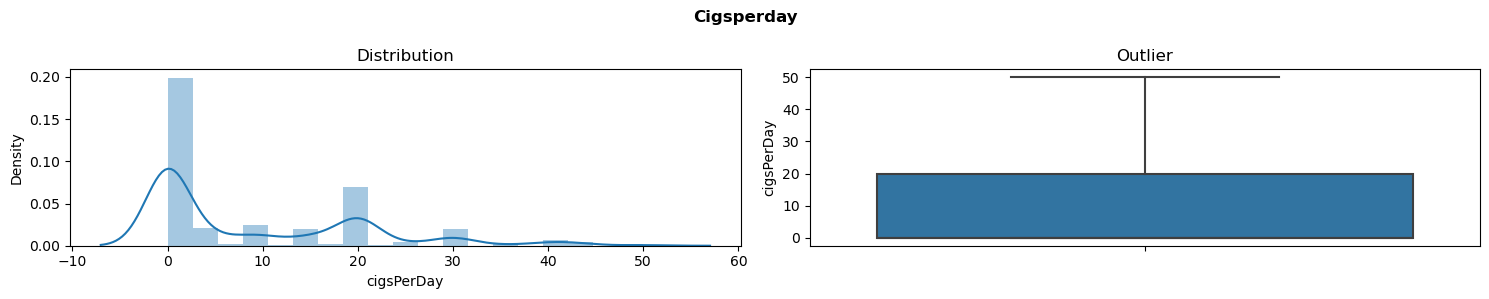

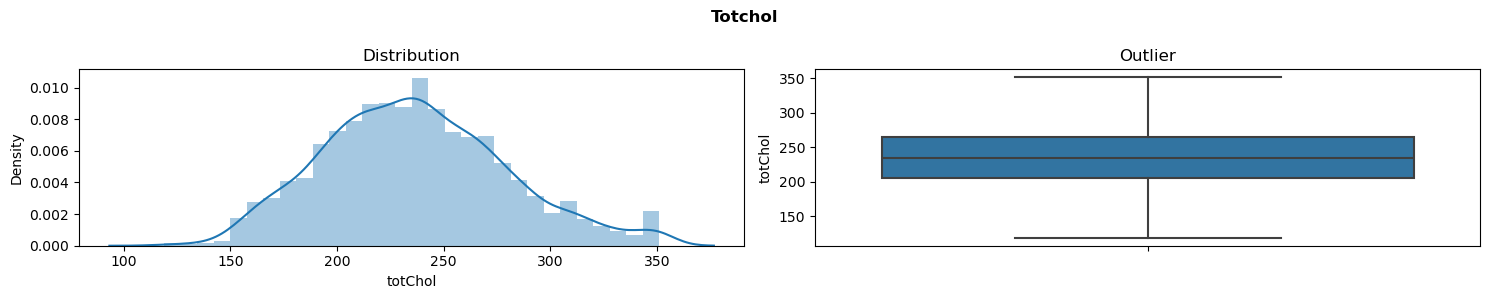

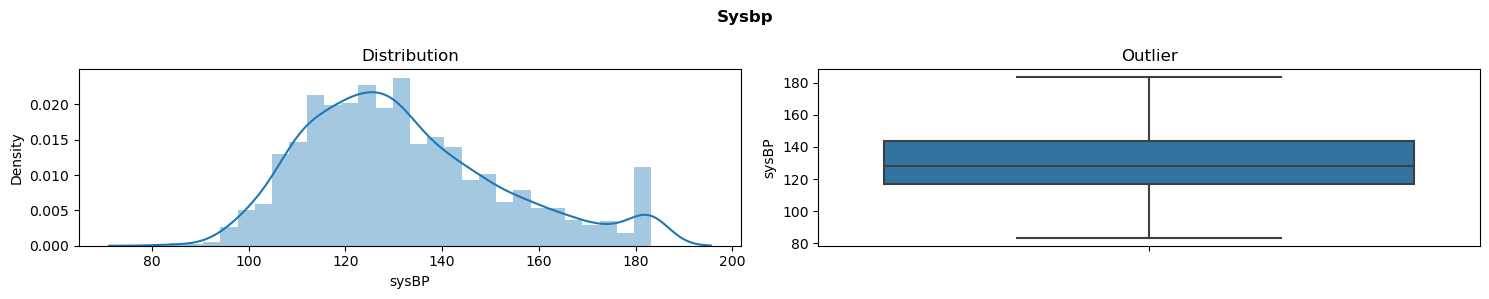

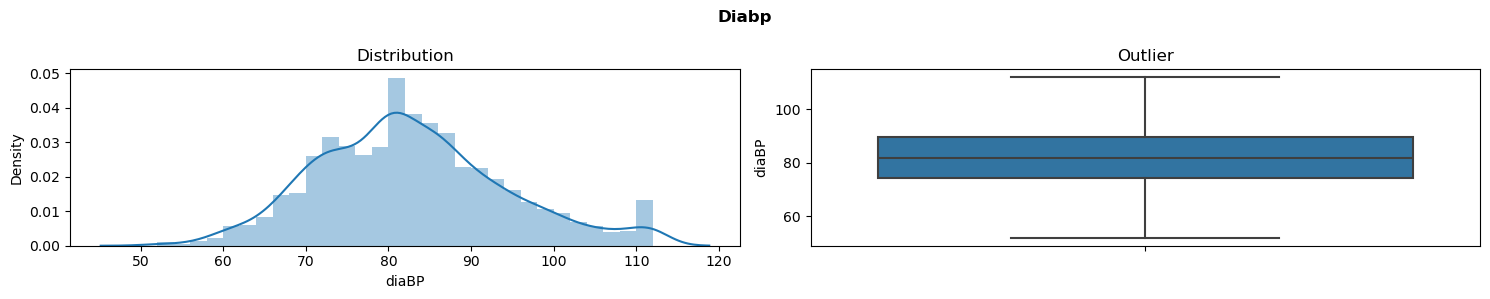

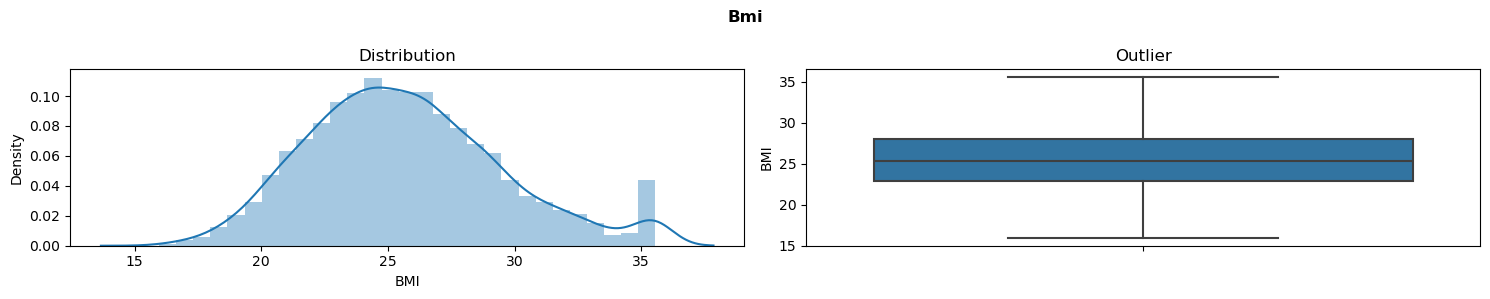

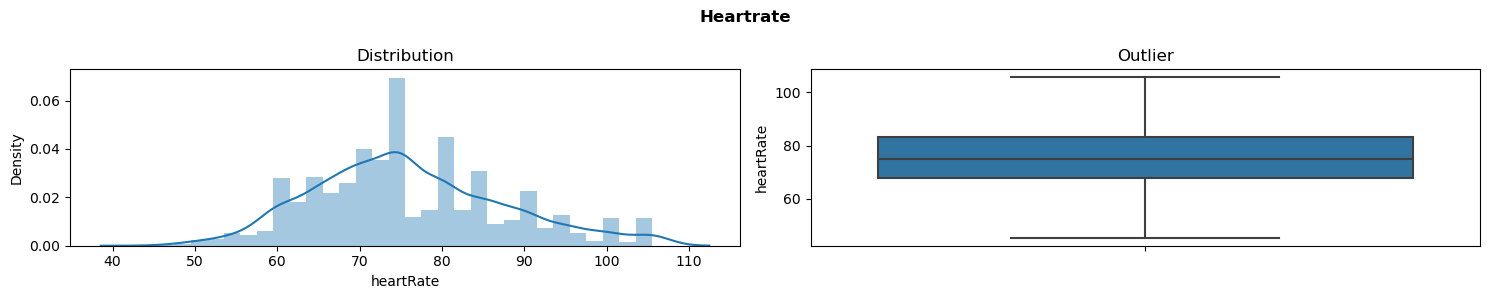

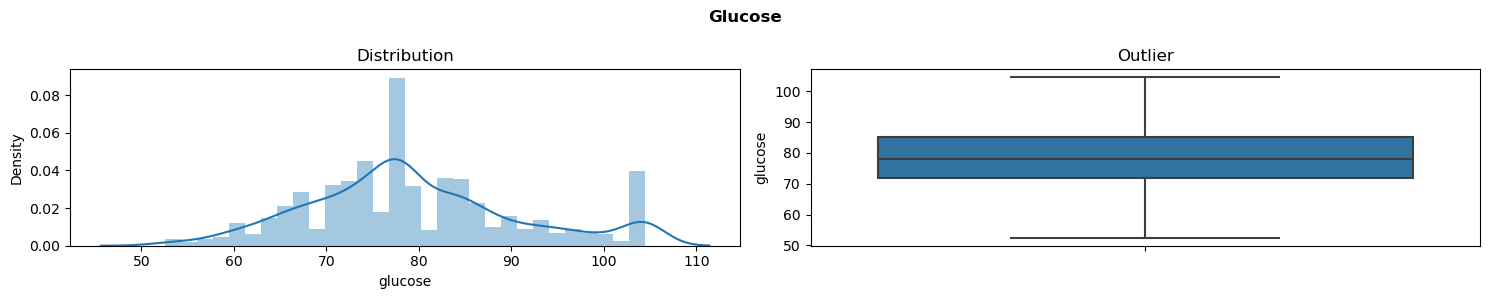

In [64]:
for col in numeric_features:
    fig, ax = plt.subplots(1,2, figsize=(15,3)) 
    sns.distplot(cardio_df[col], ax=ax[0]).set(title="Distribution")
    sns.boxplot(y=cardio_df[col], ax=ax[1]).set(title="Outlier")  # Change x to y
    plt.suptitle(f'{col.title()}',weight='bold')
    plt.tight_layout()


### Feature Engineering

### Encoding

In [65]:
# Label Encoding
cardio_df['sex'] = cardio_df['sex'].map({'M':1, 'F':0})
cardio_df['is_smoking'] = cardio_df['is_smoking'].map({'YES':1, 'NO':0})

In [66]:
# Check Unique Values for each categorical variable.
for i in categorical_features:
  print("No. of unique values in",i,"is",cardio_df[i].nunique())

No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in TenYearCHD is 2


In [67]:
# dropping the target variable from categorical f.list
categorical_features.pop(-1)

'TenYearCHD'

In [68]:
cardio_df.dtypes

id                   int64
age                  int64
education          float64
sex                  int64
is_smoking           int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [71]:
cardio_df[categorical_features] = cardio_df[categorical_features].astype(str)
cardio_df.dtypes

id                   int64
age                  int64
education           object
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [72]:
# one-hot encode the 'education' feature
education_onehot = pd.get_dummies(cardio_df['education'], prefix='education')
cardio_df.drop('education', axis=1, inplace=True)

cardio_df = pd.concat([cardio_df, education_onehot], axis=1)
cardio_df.head(3)

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
1,1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,False,False,False,True
2,2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,True,False,False,False
3,3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,True,False,False,False


### Feature Selection

<Axes: >

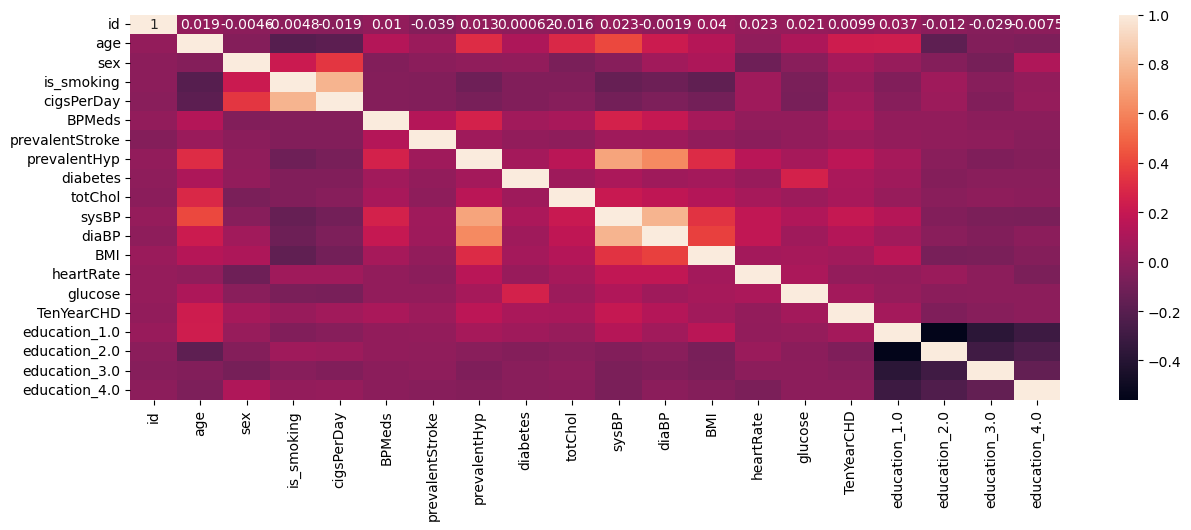

In [73]:
plt.figure(figsize=(15,5))
sns.heatmap(cardio_df.corr(), annot=True)     

In [74]:
def correlation(dataset, threshold):
    col_corr = set()                                          
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        
                colname = corr_matrix.columns[i]               
                col_corr.add(colname)
    return col_corr

In [75]:
correlation(cardio_df, 0.7)          # setting threshold of 0.7

{'cigsPerDay', 'diaBP', 'sysBP'}

In [76]:
#adding new column PulsePressure 
cardio_df['pulse_pressure'] = cardio_df['sysBP'] - cardio_df['diaBP']

#dropping the sysBP and diaBP columns
cardio_df.drop(columns=['sysBP', 'diaBP'], inplace=True)

In [77]:
#checking data, weather the provide information is correct or not
cardio_df[(cardio_df.is_smoking == 'YES') & (cardio_df.cigsPerDay == 0)]

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,pulse_pressure


In [78]:
cardio_df.drop('is_smoking', axis=1, inplace=True)

### Extra Trees Classifier

In [79]:
X = cardio_df.drop('TenYearCHD', axis=1)
y= cardio_df['TenYearCHD']

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ranked_features = pd.Series(model.feature_importances_,index=X.columns)
print(ranked_features.sort_values(ascending=False))

age                0.132490
pulse_pressure     0.119937
BMI                0.110038
id                 0.108636
totChol            0.108557
glucose            0.105987
heartRate          0.105265
cigsPerDay         0.077470
prevalentHyp       0.024597
sex                0.023708
education_1.0      0.016011
education_2.0      0.014225
education_3.0      0.013116
education_4.0      0.012300
diabetes           0.011525
BPMeds             0.010029
prevalentStroke    0.006106
dtype: float64


### Chi-square Test

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_features = SelectKBest(score_func=chi2, k='all')
model = ordered_rank_features.fit(X,y)
feature_imp = pd.Series(model.scores_,index=X.columns)
feature_imp.sort_values(ascending=False)

pulse_pressure     457.250519
age                249.931510
cigsPerDay         205.859597
totChol            199.719662
id                 178.343185
prevalentHyp        58.674438
diabetes            27.931583
glucose             27.889622
BPMeds              27.187058
sex                 12.252065
education_1.0       11.262185
BMI                  8.294096
prevalentStroke      7.219641
education_2.0        6.906798
heartRate            2.207399
education_3.0        1.827872
education_4.0        0.287447
dtype: float64

In [82]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)
mutual_data = pd.Series(mutual_info, index=X.columns)
mutual_data.sort_values(ascending=False)

age                0.031042
diabetes           0.017895
prevalentHyp       0.017174
sex                0.012654
pulse_pressure     0.008919
education_2.0      0.008795
totChol            0.008274
heartRate          0.005530
education_3.0      0.002848
id                 0.002216
BMI                0.001390
prevalentStroke    0.000000
BPMeds             0.000000
glucose            0.000000
education_1.0      0.000000
cigsPerDay         0.000000
education_4.0      0.000000
dtype: float64

### Feature Importance

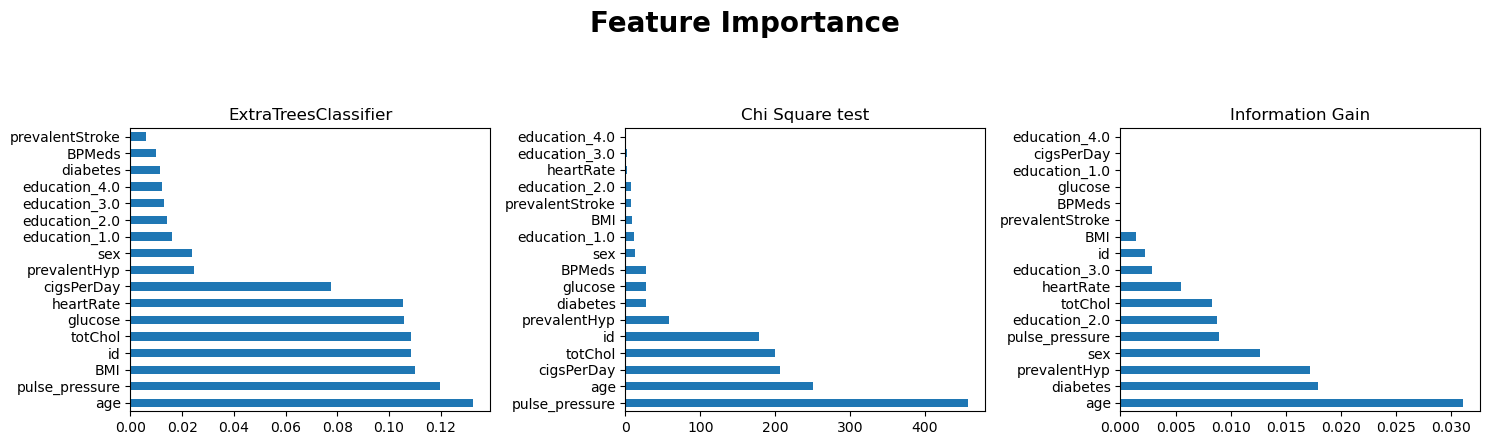

In [83]:
fig, axs = plt.subplots(1,3, figsize=(15,4))

ranked_features.sort_values(ascending=False).plot(kind='barh', title='ExtraTreesClassifier', ax=axs[0])
feature_imp.sort_values(ascending=False).plot(kind='barh', title='Chi Square test', ax=axs[1])
mutual_data.sort_values(ascending=False).plot(kind='barh', title='Information Gain', ax=axs[2])

plt.suptitle('Feature Importance', fontsize=20, fontweight='bold', y=1.1)
plt.tight_layout()

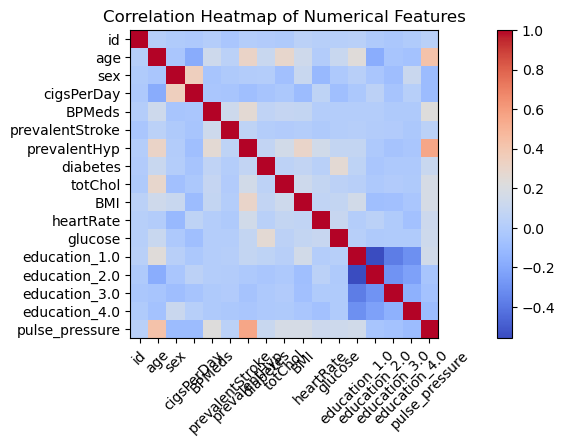

In [87]:
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = cardio_df.drop(columns='TenYearCHD').corr()

# Create heatmap using matplotlib
plt.figure(figsize=(15, 4))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()


In [88]:
correlation(cardio_df, 0.7)         # 0.7 is the thresold value for multicollinearity

set()

### Dependent and Independent Variable Assignment

In [89]:
model_df = cardio_df.copy()
model_df.head(3)

,id,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,pulse_pressure
1,1,36,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,False,False,False,True,70.0
2,2,46,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,True,False,False,False,45.0
3,3,50,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,True,False,False,False,70.0


In [90]:
X = model_df.drop(columns='TenYearCHD')     # independent features
y = model_df['TenYearCHD']                  # dependent features

### Handling Imbalance Target Variable

TenYearCHD
0    2714
1     475
Name: count, dtype: int64
 


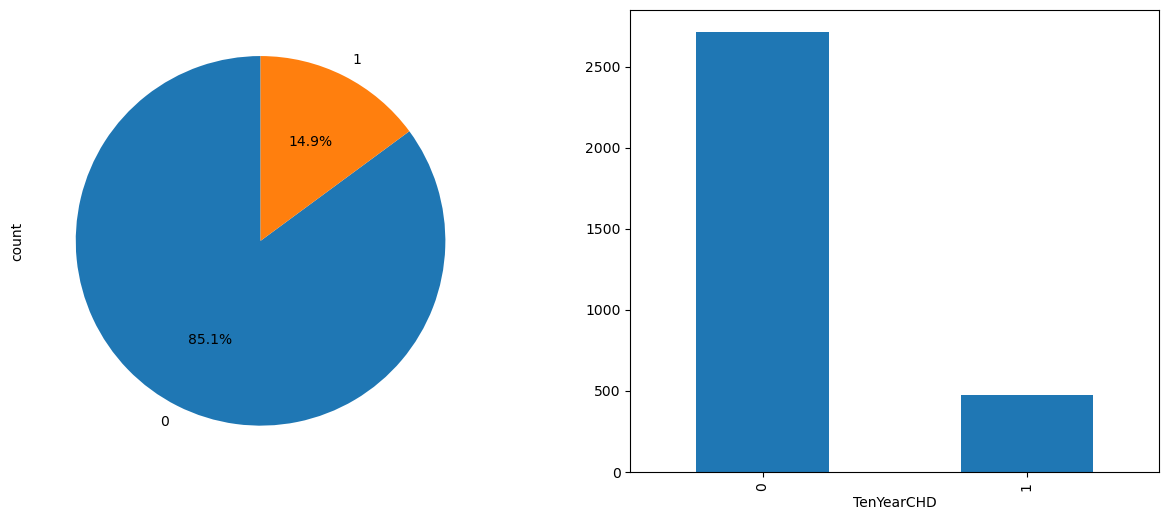

In [91]:
print(model_df.TenYearCHD.value_counts())
print(" ")

fig,ax = plt.subplots(1,2, figsize=(15,6))
model_df['TenYearCHD'].value_counts().plot(kind='pie',autopct="%1.1f%%",startangle=90, ax=ax[0])
model_df['TenYearCHD'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()

In [92]:
## using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Before Handling Imbalanced class {Counter(y)}')
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 2714, 1: 475})
After Handling Imbalanced class Counter({0: 2714, 1: 2714})


### Model Building

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(4342, 17)
(1086, 17)


In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [95]:
model_result = []                                           # empty list for appending performance metric score 

def predict(ml_model, model_name):
  
  model = ml_model.fit(X_train, y_train)
  
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  y_train_prob = model.predict_proba(X_train)[:,1]
  y_test_prob = model.predict_proba(X_test)[:,1]

  train_accuracy = accuracy_score(y_train, y_train_pred) 
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {round(train_accuracy,3)}')
  print(f'test accuracy : {round(test_accuracy,3)}')

  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')
  
  train_f1 = f1_score(y_train, y_train_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  print(f'train f1 : {round(train_f1,3)}')
  print(f'test f1 : {round(test_f1,3)}')

  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {round(train_roc_auc,3)}')
  print(f'test roc_auc : {round(test_roc_auc,3)}')
  print('-'*80)

  #classification report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)

  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)
  
  fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
  plt.plot(fpr,tpr, label=f'ROC - {model_name}')
  plt.plot([0,1], [0,1], '--')
  plt.title('ROC curve on Test data', weight='bold')
  plt.xlabel('False Positive Rate----->')
  plt.ylabel('True Positive Rate----->')
  plt.legend(loc=4)

  d = {'y_actual':y_test, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T)                  
  print('-'*80)


  model_result.append({'model':model_name,                              #using the score from the performance metrics to create the final model_result.
                       'train_accuracy':train_accuracy, 
                       'test_accuracy':test_accuracy, 
                       'train_precision':train_precision,
                       'test_precision':test_precision,
                       'train_recall':train_recall,
                       'test_recall':test_recall,
                       'train_f1':train_f1,
                       'test_f1':test_f1,
                       'train_roc_auc':train_roc_auc,
                       'test_roc_auc':test_roc_auc})

### Model Implementation

#Logistic Regression

train accuracy : 0.801
test accuracy : 0.806
train precision : 0.859
test precision : 0.876
train recall : 0.715
test recall : 0.732
train f1 : 0.78
test f1 : 0.798
train roc_auc : 0.886
test roc_auc : 0.895
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       518
           1       0.88      0.73      0.80       568

    accuracy                           0.81      1086
   macro avg       0.81      0.81      0.81      1086
weighted avg       0.82      0.81      0.81      1086

--------------------------------------------------------------------------------


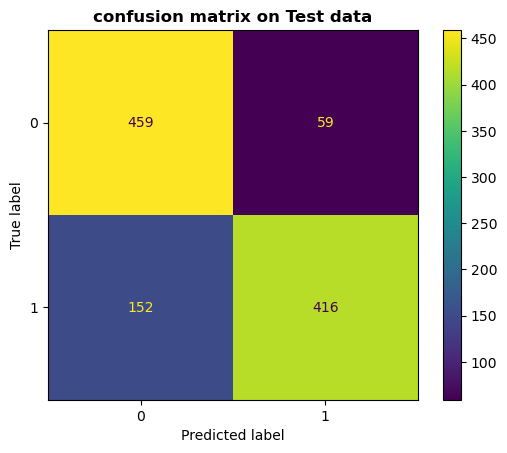

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


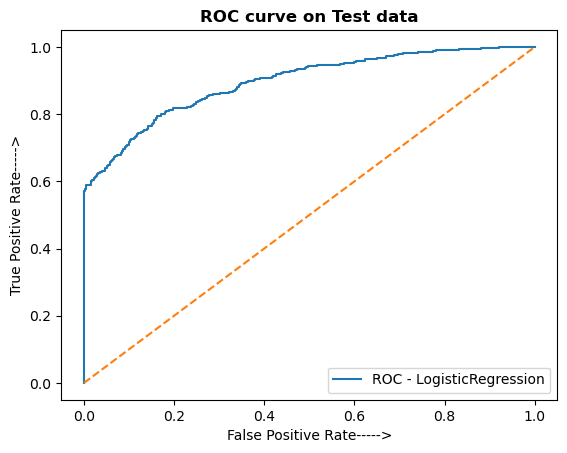

In [96]:
predict(LogisticRegression(), 'LogisticRegression')

### Support Vector Machine

train accuracy : 0.876
test accuracy : 0.861
train precision : 0.949
test precision : 0.923
train recall : 0.791
test recall : 0.801
train f1 : 0.863
test f1 : 0.858
train roc_auc : 0.951
test roc_auc : 0.928
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       518
           1       0.92      0.80      0.86       568

    accuracy                           0.86      1086
   macro avg       0.87      0.86      0.86      1086
weighted avg       0.87      0.86      0.86      1086

--------------------------------------------------------------------------------


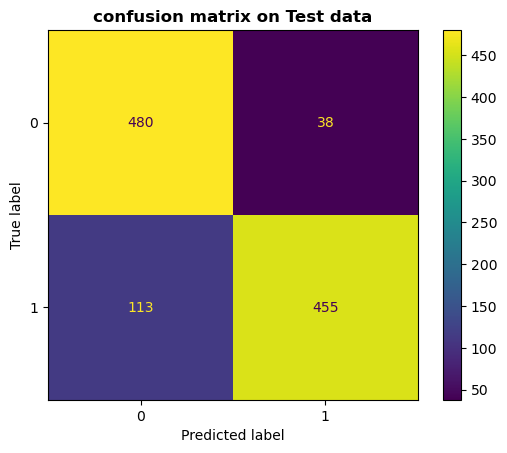

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


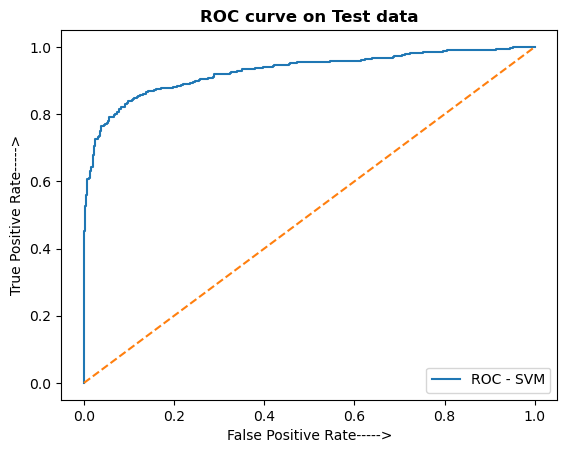

In [97]:
predict(SVC(probability=True), 'SVM')

### KNN

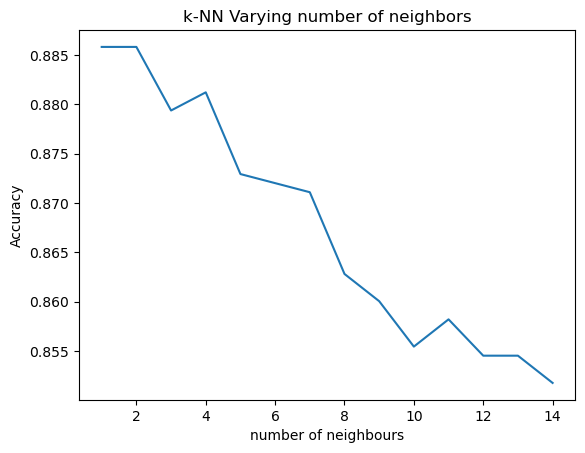

In [98]:
accuracy=[]
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy.append(knn.score(X_test, y_test))
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15), accuracy)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.show()

train accuracy : 1.0
test accuracy : 0.886
train precision : 1.0
test precision : 0.865
train recall : 1.0
test recall : 0.926
train f1 : 1.0
test f1 : 0.895
train roc_auc : 1.0
test roc_auc : 0.884
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       518
           1       0.87      0.93      0.89       568

    accuracy                           0.89      1086
   macro avg       0.89      0.88      0.89      1086
weighted avg       0.89      0.89      0.89      1086

--------------------------------------------------------------------------------


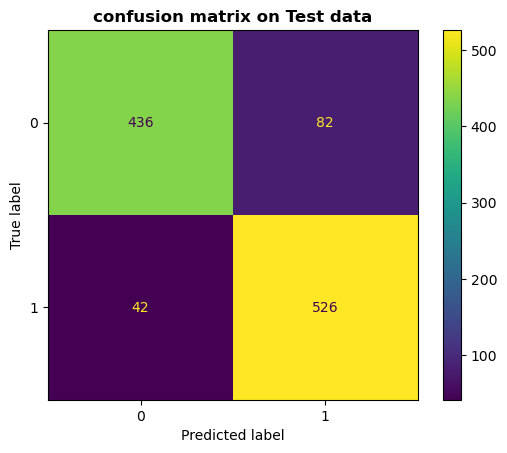

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     1     1
--------------------------------------------------------------------------------


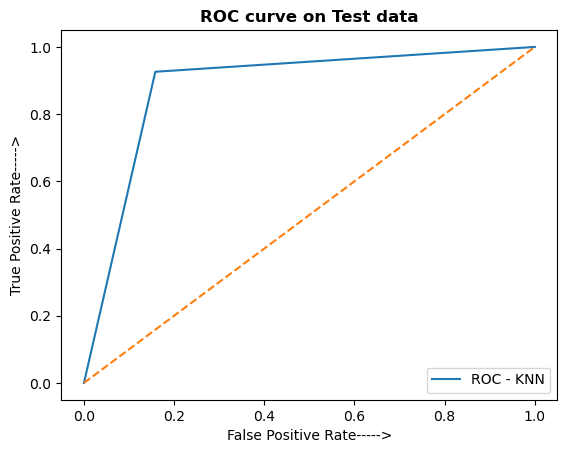

In [99]:
predict(KNeighborsClassifier(n_neighbors=1), 'KNN')

### Decision Tree

train accuracy : 1.0
test accuracy : 0.857
train precision : 1.0
test precision : 0.859
train recall : 1.0
test recall : 0.87
train f1 : 1.0
test f1 : 0.864
train roc_auc : 1.0
test roc_auc : 0.857
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       518
           1       0.86      0.87      0.86       568

    accuracy                           0.86      1086
   macro avg       0.86      0.86      0.86      1086
weighted avg       0.86      0.86      0.86      1086

--------------------------------------------------------------------------------


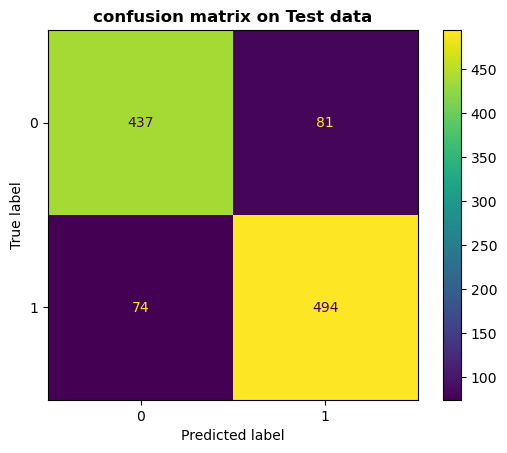

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


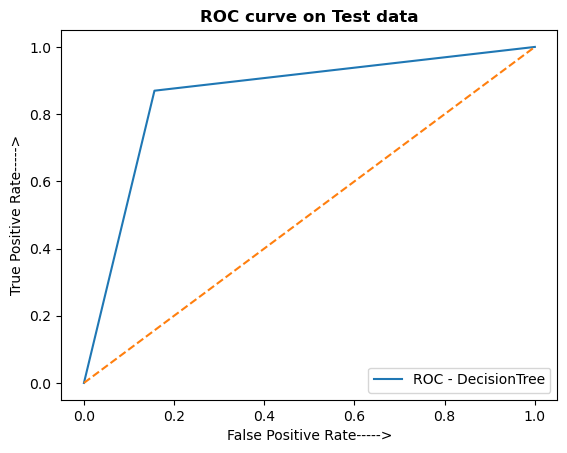

In [100]:
predict(DecisionTreeClassifier(), 'DecisionTree')

### Random Forest

In [101]:
rf_params = {'n_estimators': [500,600,800],     
             'max_features': ["log2", "sqrt"],  
             'max_depth': [35,40,45,50],       
             'min_samples_split': [7,9,12],    
             'min_samples_leaf': [4,7,10]}     

rf = RandomForestClassifier()             # performing Hyperparameter Tunning using RandomizedSearchCV
rf_randomsearch = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=15, cv=5, verbose=2, n_jobs=-1)
rf_randomsearch.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [35, 40, 45, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [4, 7, 10],
                                        'min_samples_split': [7, 9, 12],
                                        'n_estimators': [500, 600, 800]},
                   verbose=2)

In [102]:
optimal_model = rf_randomsearch.best_estimator_
optimal_model

RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=4,
                       min_samples_split=7, n_estimators=500)

train accuracy : 0.961
test accuracy : 0.9
train precision : 0.994
test precision : 0.944
train recall : 0.926
test recall : 0.859
train f1 : 0.959
test f1 : 0.9
train roc_auc : 0.998
test roc_auc : 0.955
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       518
           1       0.94      0.86      0.90       568

    accuracy                           0.90      1086
   macro avg       0.90      0.90      0.90      1086
weighted avg       0.90      0.90      0.90      1086

--------------------------------------------------------------------------------


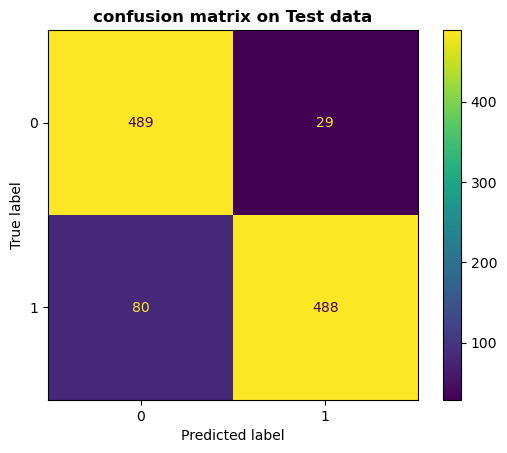

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


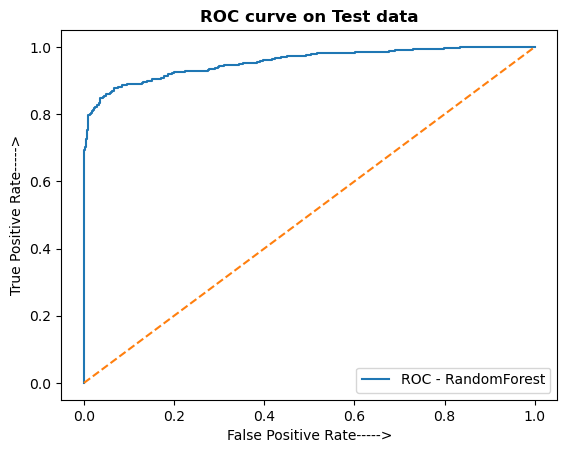

In [103]:
predict(optimal_model, 'RandomForest')

In [104]:
importances = optimal_model.feature_importances_
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
6,prevalentHyp,0.166952
2,sex,0.156744
1,age,0.108257
3,cigsPerDay,0.076096
16,pulse_pressure,0.074979
0,id,0.058245
12,education_1.0,0.057211
8,totChol,0.054554
11,glucose,0.051551
9,BMI,0.046433


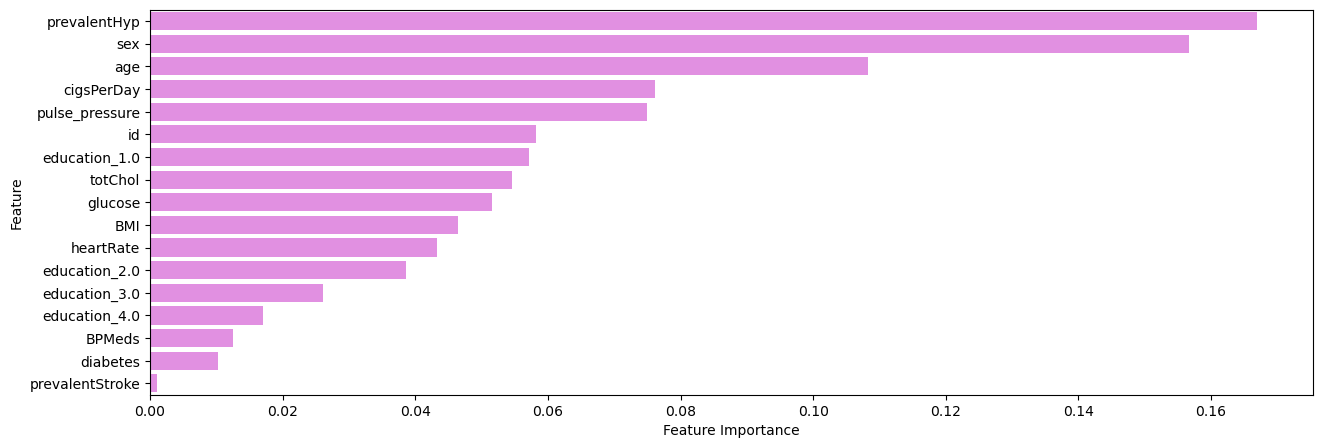

In [105]:
plt.figure(figsize=(15,5))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='violet')
plt.show()

### AdaBoost

train accuracy : 0.872
test accuracy : 0.873
train precision : 0.916
test precision : 0.915
train recall : 0.816
test recall : 0.835
train f1 : 0.863
test f1 : 0.873
train roc_auc : 0.936
test roc_auc : 0.932
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       518
           1       0.92      0.83      0.87       568

    accuracy                           0.87      1086
   macro avg       0.87      0.87      0.87      1086
weighted avg       0.88      0.87      0.87      1086

--------------------------------------------------------------------------------


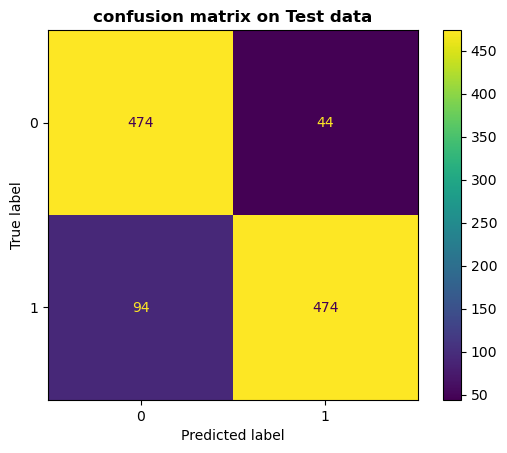

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


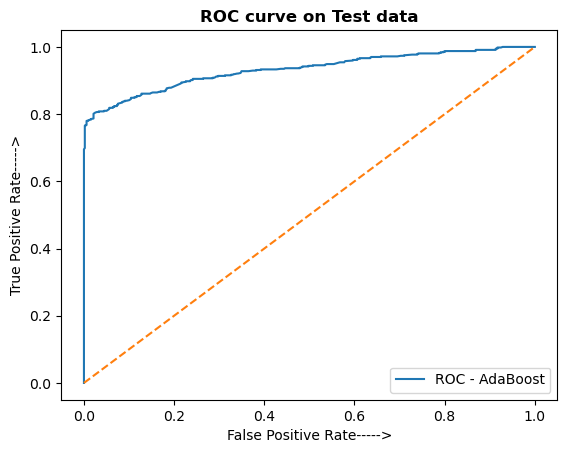

In [106]:
predict(AdaBoostClassifier(), 'AdaBoost')

### XGBoost

In [107]:
xgb_params = {'n_estimators': [1000],    
          'max_depth': [6,9],            
          'min_samples_split': [5,7],   
          'min_samples_leaf': [6,8],     
          'learning_rate':[0.1]}         

xgb = XGBClassifier()
xgb_gridsearch = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, n_jobs=-1, verbose=2)
xgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [6, 9],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [5, 7], 'n_estimators': [1000]},
             verbose=2)

In [108]:
optimal_model = xgb_gridsearch.best_estimator_
optimal_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, min_samples_leaf=6, min_samples_split=5,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=1000, n_jobs=None, ...)

train accuracy : 1.0
test accuracy : 0.913
train precision : 1.0
test precision : 0.944
train recall : 1.0
test recall : 0.887
train f1 : 1.0
test f1 : 0.915
train roc_auc : 1.0
test roc_auc : 0.958
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       518
           1       0.94      0.89      0.91       568

    accuracy                           0.91      1086
   macro avg       0.91      0.91      0.91      1086
weighted avg       0.92      0.91      0.91      1086

--------------------------------------------------------------------------------


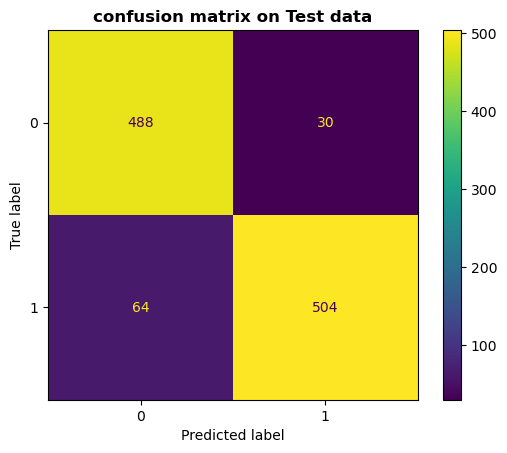

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


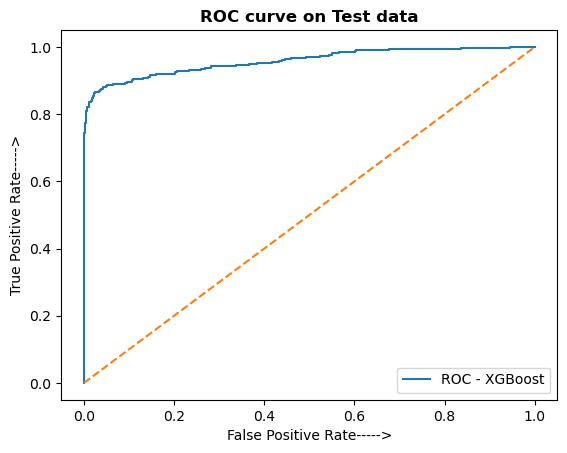

In [109]:
predict(optimal_model, 'XGBoost')

In [110]:
importances = optimal_model.feature_importances_
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
6,prevalentHyp,0.326651
2,sex,0.151558
7,diabetes,0.066463
14,education_3.0,0.064377
13,education_2.0,0.062972
4,BPMeds,0.057516
15,education_4.0,0.055412
12,education_1.0,0.055361
5,prevalentStroke,0.031297
1,age,0.024511


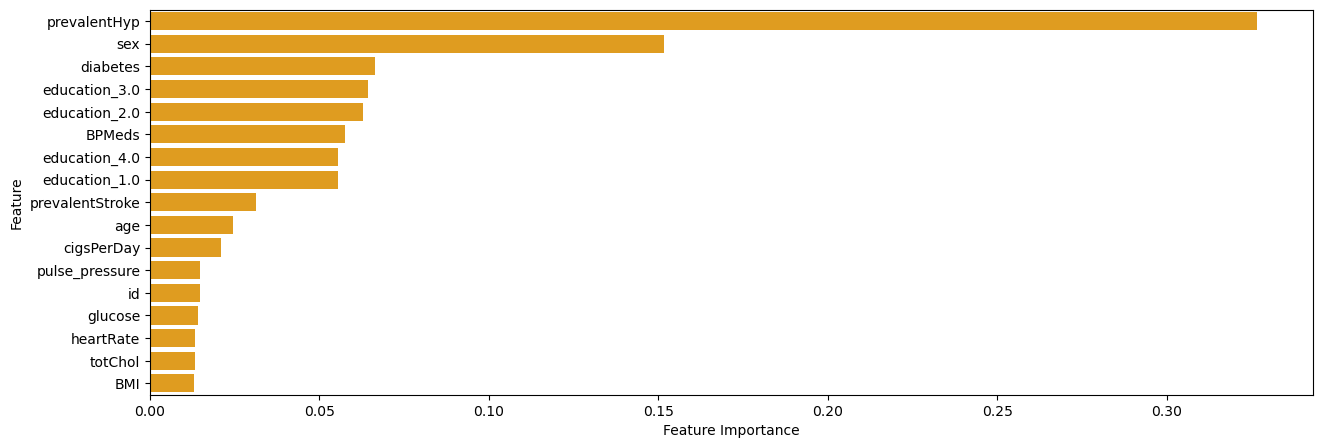

In [113]:
plt.figure(figsize=(15,5))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='orange')
plt.show()

### Light Gradient Boosting

In [114]:
lgb_params = {'n_estimators': [1000],   
          'max_depth': [7,9],         
          'min_samples_split': [4,5],  
          'min_samples_leaf': [4,6],   
          'learning_rate':[0.1]}       
lgb = LGBMClassifier(objective='binary')
lgb_gridsearch = GridSearchCV(estimator=lgb, param_grid=lgb_params, cv=5, verbose=2, n_jobs=-1)
lgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2146, number of negative: 2196
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001882 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2496
[Li

GridSearchCV(cv=5, estimator=LGBMClassifier(objective='binary'), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [7, 9],
                         'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 5], 'n_estimators': [1000]},
             verbose=2)

In [115]:
optimal_model = lgb_gridsearch.best_estimator_
optimal_model

LGBMClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=4,
               n_estimators=1000, objective='binary')

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2146, number of negative: 2196
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2496

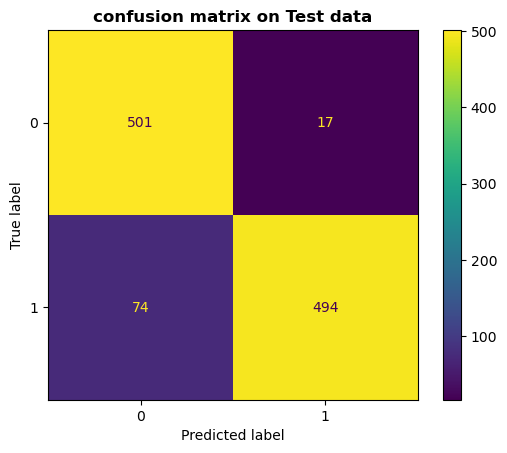

--------------------------------------------------------------------------------
           2090  4907  963   1748  3442  1059  878   4245  2571  4996
y_actual      0     1     0     0     1     0     0     1     1     1
y_predict     0     1     0     0     1     0     0     1     0     1
--------------------------------------------------------------------------------


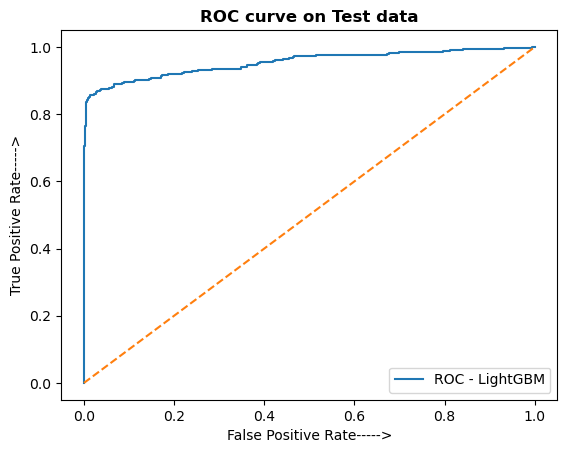

In [116]:
predict(optimal_model, 'LightGBM')

In [117]:
importances = optimal_model.feature_importances_
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
0,id,4657
9,BMI,3935
8,totChol,3800
16,pulse_pressure,3697
11,glucose,3327
10,heartRate,3143
1,age,2686
3,cigsPerDay,1592
2,sex,558
6,prevalentHyp,532


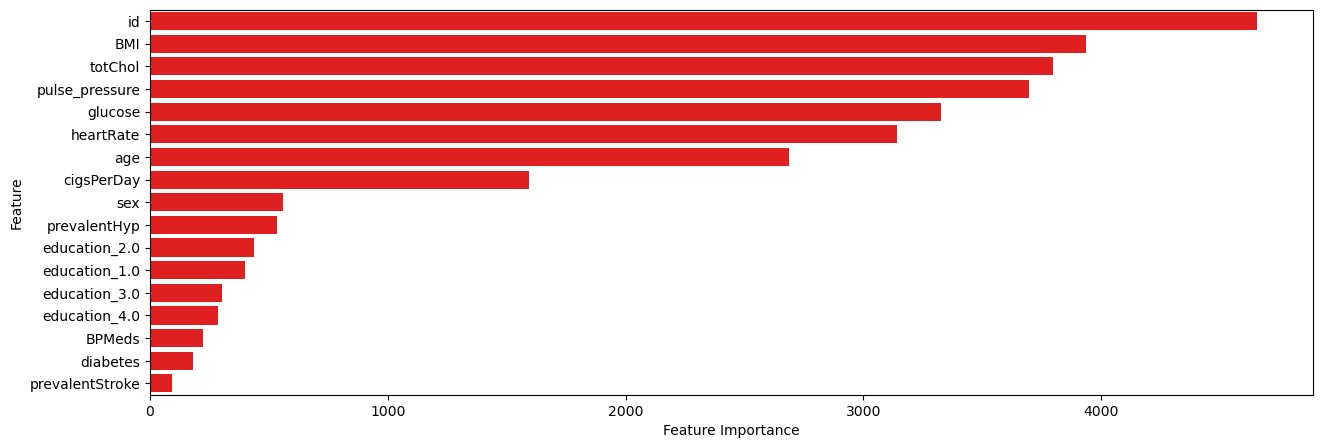

In [119]:
plt.figure(figsize=(15,5))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='red')
plt.show()

### Model Result

In [120]:
model_result = pd.DataFrame(model_result)
round(model_result,3)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_roc_auc,test_roc_auc
0,LogisticRegression,0.801,0.806,0.859,0.876,0.715,0.732,0.780,0.798,0.886,0.895
1,SVM,0.876,0.861,0.949,0.923,0.791,0.801,0.863,0.858,0.951,0.928
2,KNN,1.000,0.886,1.000,0.865,1.000,0.926,1.000,0.895,1.000,0.884
3,DecisionTree,1.000,0.857,1.000,0.859,1.000,0.870,1.000,0.864,1.000,0.857
4,RandomForest,0.961,0.900,0.994,0.944,0.926,0.859,0.959,0.900,0.998,0.955
5,AdaBoost,0.872,0.873,0.916,0.915,0.816,0.835,0.863,0.873,0.936,0.932
6,XGBoost,1.000,0.913,1.000,0.944,1.000,0.887,1.000,0.915,1.000,0.958
7,LightGBM,1.000,0.916,1.000,0.967,1.000,0.870,1.000,0.916,1.000,0.954


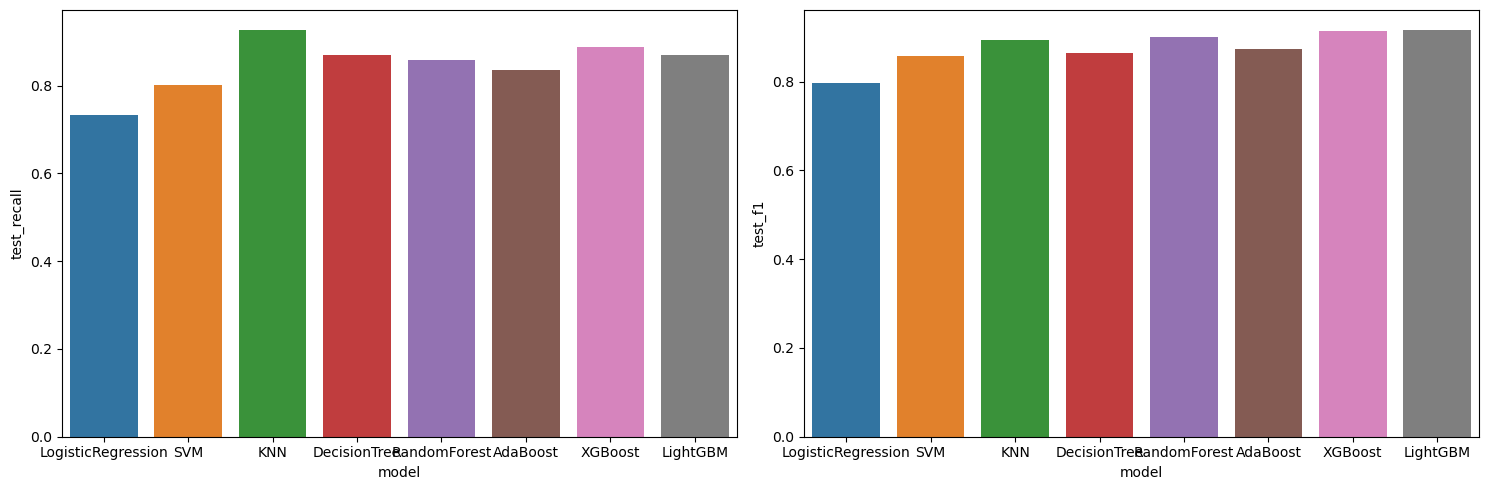

In [121]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test_recall'], ax=axs[0])   #Model vs Recall score
sns.barplot(x=model_result['model'], y=model_result['test_f1'], ax=axs[1])       #Model vs F1 score 
plt.tight_layout()

### Thank You !!!!